In [1]:
from pandas import read_csv
from autoencoder.autoencoder import AnomalyDetector
from turtleIsolationForests.isolationForest import IsolationForest
from turtleIsolationForests.extendedIsolationForest import ExtendedIsolationForest
from turtleIsolationForests.sciForest import SCIsolationForest
from turtleIsolationForests.FBIF import FBIsolationForest
from turtleIsolationForests.preprocessFeatures import minmax_preprocess_features
from pipelineUtils.runPipeline import run_pipeline

In [2]:
train_dataframe = read_csv("./eda_simple_classification/network_data_mod_train.csv", index_col=0)
test_dataframe = read_csv("./eda_simple_classification/network_data_mod_test.csv", index_col=0)
X_train, X_test, train_labels, test_labels = minmax_preprocess_features(train_dataframe, test_dataframe)
contamination = sum(train_labels) / len(train_labels)
contamination

0.4654171925730117

Epoch 1/5000
1466/1466 [==============================] - 5s 2ms/step - loss: 0.0846 - val_loss: 0.0583
Epoch 2/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0424 - val_loss: 0.0387
Epoch 3/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0383 - val_loss: 0.0380
Epoch 4/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0315 - val_loss: 0.0247
Epoch 5/5000
1466/1466 [==============================] - 6s 4ms/step - loss: 0.0226 - val_loss: 0.0219
Epoch 6/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 7/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0205 - val_loss: 0.0205
Epoch 8/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0201 - val_loss: 0.0202
Epoch 9/5000
1466/1466 [==============================] - 3s 2ms/step - loss: 0.0197 - val_loss: 0.0196
Epoch 10/5000
1466/1466 [==============================] - 3s 2m

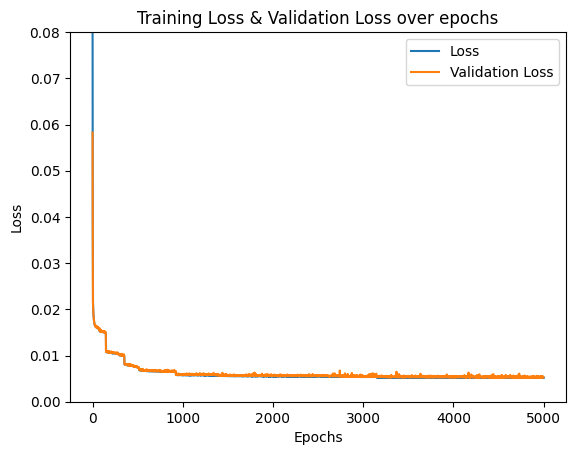

Autoencoder Results
true anomalies: 6638
false anomalies: 7833
false normals: 6195
true normals: 1878
precision: 0.4587105244972704
recall: 0.5172601885763266
f1-score: 0.4862291239378845
auroc: 0.4195349954044359
test set prediction time: 3.8691630363464355

Isolation Forest Results
true anomalies: 4804
false anomalies: 718
false normals: 1834
true normals: 7115
precision: 0.8699746468670772
recall: 0.7237119614341669
f1-score: 0.7901315789473684
auroc: 0.8391098479493996
test set prediction time: 4.958137512207031

Pipeline Results:
true anomalies: 4804
false anomalies: 718
false normals: 8029
true normals: 8993
precision: 0.8699746468670772
recall: 0.3743473856463804
f1-score: 0.5234540997003541
Stage 1 prediction time: 3.8691630363464355
Percentage of data passed to stage 2: 0.6419002838892832
Stage 2 prediction time: 4.958137512207031


In [3]:
autoenc = AnomalyDetector()
autoenc.compile(optimizer='adam', loss='mae')
iForest = IsolationForest(contamination = contamination, random_state = None)
run_pipeline(X_train, X_test, train_labels, test_labels, autoenc, iForest, intermediatePrint=True, printHistory=True, epochs=5000)

Epoch 1/5000
1466/1466 [==============================] - 9s 4ms/step - loss: 0.0686 - val_loss: 0.0405
Epoch 2/5000
1466/1466 [==============================] - 5s 4ms/step - loss: 0.0396 - val_loss: 0.0385
Epoch 3/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0377 - val_loss: 0.0375
Epoch 4/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0370 - val_loss: 0.0373
Epoch 5/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0362 - val_loss: 0.0348
Epoch 6/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0335 - val_loss: 0.0333
Epoch 7/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0325 - val_loss: 0.0326
Epoch 8/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0318 - val_loss: 0.0320
Epoch 9/5000
1466/1466 [==============================] - 4s 3ms/step - loss: 0.0314 - val_loss: 0.0317
Epoch 10/5000
1466/1466 [==============================] - 4s 3m

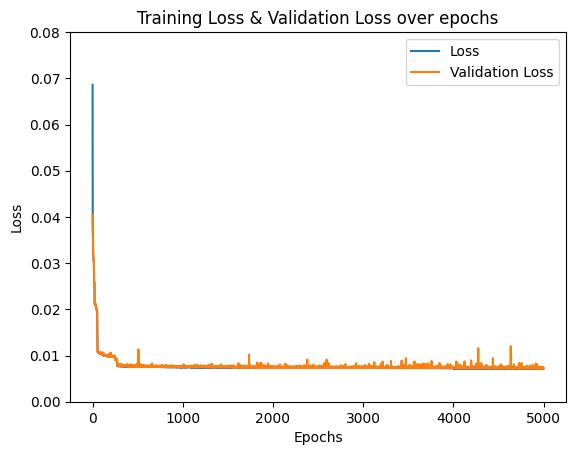

Autoencoder Results
true anomalies: 9612
false anomalies: 8707
false normals: 3221
true normals: 1004
precision: 0.5247011299743436
recall: 0.7490064677004598
f1-score: 0.6171032357473035
auroc: 0.39648844675888095
test set prediction time: 3.892047643661499

Isolation Forest Results
true anomalies: 7897
false anomalies: 1080
false normals: 1715
true normals: 7627
precision: 0.8796925476216999
recall: 0.8215771951727008
f1-score: 0.8496422615525311
auroc: 0.8869165961578692
test set prediction time: 10.32879900932312

Pipeline Results:
true anomalies: 7897
false anomalies: 1080
false normals: 4936
true normals: 8631
precision: 0.8796925476216999
recall: 0.6153666328995558
f1-score: 0.7241632278771207
Stage 1 prediction time: 3.892047643661499
Percentage of data passed to stage 2: 0.8125887154009936
Stage 2 prediction time: 10.32879900932312


In [4]:
autoenc = AnomalyDetector()
autoenc.compile(optimizer='adam', loss='mae')
eif = ExtendedIsolationForest(contamination = contamination, random_state = None)
run_pipeline(X_train, X_test, train_labels, test_labels, autoenc, eif, intermediatePrint=True, printHistory=True, epochs=5000)